# Load the Dataset

In [2]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
X = wine.data
y = wine.target
df = pd.DataFrame(X, columns=wine.feature_names)
print(df.head())
print(df.describe())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

# Standard Scaler

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# PCA

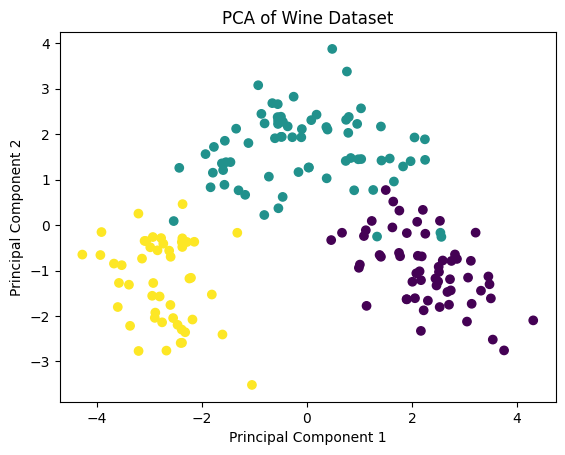

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.show()


# TSNE

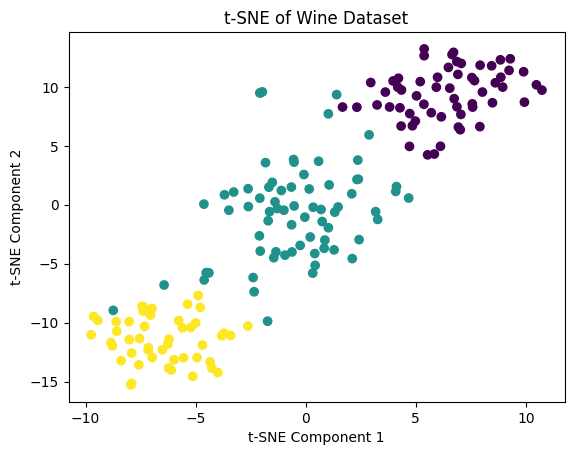

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Wine Dataset')
plt.show()


# K-Means 

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans_pca = kmeans.fit_predict(X_pca)
y_kmeans_original = kmeans.fit_predict(X_scaled)
y_kmeans_tsne=kmeans.fit_predict(X_tsne)
silhouette_pca = silhouette_score(X_pca, y_kmeans_pca)
silhouette_original = silhouette_score(X_scaled, y_kmeans_original)
silhouette_tsne = silhouette_score(X_tsne, y_kmeans_tsne)

print(f'Silhouette Score on PCA reduced data: {silhouette_pca}')
print(f'Silhouette Score on T-SNE reduced data: {silhouette_tsne}')
print(f'Silhouette Score on original data: {silhouette_original}')


Silhouette Score on PCA reduced data: 0.5610505693103248
Silhouette Score on T-SNE reduced data: 0.6160597205162048
Silhouette Score on original data: 0.2848589191898987


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

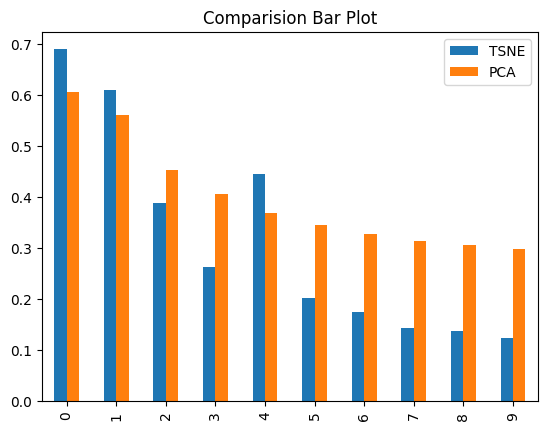

In [20]:
import pandas as pd
tsne_ss=[]
pca_ss=[]
for i in range(1,11):
    tsne = TSNE(n_components=i, random_state=0,method='exact')
    X_tsne = tsne.fit_transform(X_scaled)
    y_kmeans_tsne=kmeans.fit_predict(X_tsne)
    silhouette_tsne = silhouette_score(X_tsne, y_kmeans_tsne)
    tsne_ss.append(silhouette_tsne)
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_scaled)
    y_kmeans_pca = kmeans.fit_predict(X_pca)
    silhouette_pca = silhouette_score(X_pca, y_kmeans_pca)
    pca_ss.append(silhouette_pca)
df=pd.DataFrame({'TSNE':tsne_ss,'PCA':pca_ss})
df.plot(kind='bar')
plt.title('Comparision Bar Plot')
plt.show()

In [19]:
len(tsne_ss)

9